In [1]:
## Libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate a list from -x to x including 0
def ss(n):
    pos = [x for x in range(1,n + 1)]
    neg = sorted([-x for x in range(1,n + 1)])
    v = neg + [0] + pos
    return np.array(v)

In [3]:
## Define dimension of 4D cube
dim = 4
v = ss(1)
lv = len(v)

# Create skeleton of the matrix
V = np.zeros((dim, lv**dim))

# Adjust entries as given by matlab code
k = [x for x in range(1, dim+1)]
for i in k:
    V[i-1, :] = np.kron(np.ones((1, lv**(dim - i))), np.kron(v,np.ones((1, lv**(i - 1)))))

# Define U matrix that does the rotation
U = (1/2) * np.array([[-1,0,-1,np.sqrt(2)],[1,np.sqrt(2),-1,0],[-1,0,-1,-np.sqrt(2)],[-1,np.sqrt(2),1,0]])

# Create the rotated matrix V through matri multiplication
V_rot = np.matmul(U,V)

In [4]:
## Now we select the points for the projection 
## This is based on whether or not the points lie inside an octagon when projected on 3rd and 4th dimensions 

# Define an empty list to store lattice points for projection in
z = []

# DOUBLE CHECK WITH ANNE TO REALISE FUNCTION OF THESE TWO
v_ref = np.exp(1j * np.arange(-0.75, 1.25, 0.25) * np.pi)
y_ref = 1/(2*np.sqrt(2)*np.tan(np.pi/8))

# For loop checking and selecting points for aperiodic lattice
k_2 = [x for x in range(1, lv**dim)]
for i in k_2:
    if max(abs((v_ref.conj().T * np.array(V_rot[2, i] + 1j * V_rot[3, i])).real)) <= y_ref + 10**(-8):
        element = V_rot[0, i] + 1j * V_rot[1,i]
        z.append(element)

# Find index of z = 0
index_0 = [i for i in range(len(z)) if abs(z[i]) == 0]
# Calculate the shortest distance and use this as the tile lengths for all vertecies
dists_0 = [abs(z[index_0[0]] - i) for i in z]
tile_len = min([x for x in dists_0 if x > 0])
# Then we calculate the possible jumps of all vertices.
def jump_finder(input_list):
    # Define empty possible jumps
    total_jumps = []
    jump_indices = []
    for i in input_list:
        # Calculate every jump for every point
        jumps = [x for x in input_list if tile_len - 10**(-lv) <= abs(i - x) <= tile_len + 10**(-lv)]
        # Find index of site to which we may jump
        indices = [j for j in range(len(input_list)) for y in jumps if input_list[j] == y]
        # Append to main lists
        total_jumps.append(jumps)
        jump_indices.append(indices)
    return total_jumps, jump_indices
total_jumps, jump_indices = jump_finder(z)

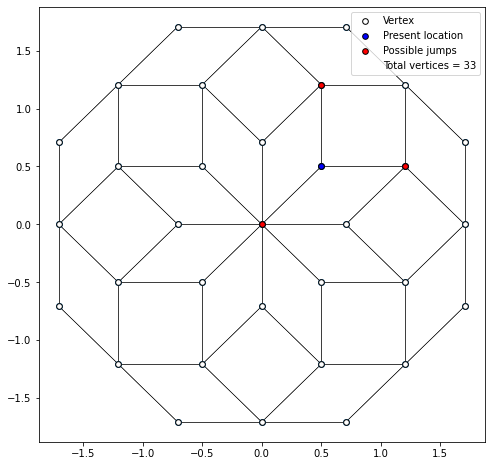

In [5]:
# Define figure
fig, ax = plt.subplots(figsize=(8,8))

# Plot all possible paths between vertices
for i,j in zip(z,total_jumps):
    xs = [w.real for w in j]
    ys = [w.imag for w in j]
    for l,k in zip(xs,ys):
        ax.plot([i.real, l], [i.imag, k], color= 'k', zorder= 1, linewidth= 0.5)

# Extract coordinates in cartesian terms
xs = [w.real for w in z]
ys = [w.imag for w in z]

# Choose index to highlight a specific vertex and its connecting points
ind_choice = int(len(z)*0.33)
#ind_choice = 0

xs_jumps = [w.real for w in total_jumps[ind_choice]]
ys_jumps = [w.imag for w in total_jumps[ind_choice]]

ax.scatter(xs,ys)

marker_size = 32

ax.scatter(x= xs, y= ys, s= marker_size, facecolor= 'w', edgecolor= 'k', label= "Vertex")
ax.scatter(x= xs[ind_choice], y= ys[ind_choice], s= marker_size, facecolor= 'b', edgecolor= 'k', label= "Present location")
ax.scatter(x= xs_jumps, y= ys_jumps, s= marker_size, facecolor= 'r', edgecolor= 'k', label= "Possible jumps")
ax.plot([],[], linestyle= '', label= "Total vertices = {}".format(len(z)))

ax.legend()

plt.savefig('../Illustrations/hofstadter_AB_tiling.png')
plt.show()

In [6]:
# Define now a skeleton of the Hamiltonian 
dim_H = len(z)
H = np.zeros((dim_H, dim_H))
k_H = [x for x in range(0, dim_H)]

# Fill out the Hamiltonian according to the psi vector, i.e. the basis chosen through generation of the tiling
for i, j in zip(k_H, jump_indices):
    for k in j:
        H[i, k] = -


SyntaxError: invalid syntax (1827829136.py, line 9)